# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [7]:
df = pd.read_csv('data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Diving the data into features and labels (X and y)

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

Splitting the data into train and test parts

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [10]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest cross-validation score:")
print(grid_search.best_score_)

best_rfc = grid_search.best_estimator_

Starting GridSearchCV...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters found by GridSearchCV:
{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}

Best cross-validation score:
0.9916666666666666


Evaluate the model by displaying a confusion matrix and a classification report 


Evaluating the best model on the test set...

Test Set Accuracy: 0.9976

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412


Confusion Matrix:


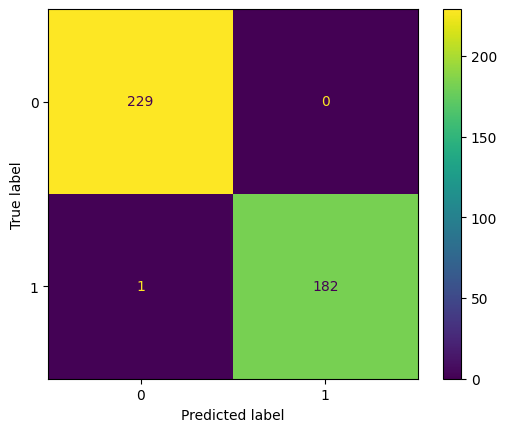

In [ ]:
print("\nEvaluating the best model on the test set...")
y_pred = best_rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot()
plt.show()